# A Fine Windy Day - Power Prediction

https://www.hackerearth.com/problem/machine-learning/predict-the-power-kwh-produced-from-the-windmills-8-f055f832/

Jul-2021

Author: brugmark

## Introduction
This notebook's structure is based on the CRISP-DM methodology (see below) and consists of the following sections:
1. Data Understanding
2. Data Preparation
3. Modeling
<br>
<img src= "https://st12.ning.com/topology/rest/1.0/file/get/2808314343?profile=original" width="400">

First, let's import some modules:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import math
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV

## 1. Data Understanding
To improve our understanding of the data, we will:
- Collect data
- Describe data
- Explore data
- Verify data quality

### Collect

In [2]:
train = pd.read_csv(r'C:\Users\MBRU\PycharmProjects\GitProjects\Data_Science\A_Fine_Windy_Day_(HackerEarth)\train.csv')
test = pd.read_csv(r'C:\Users\MBRU\PycharmProjects\GitProjects\Data_Science\A_Fine_Windy_Day_(HackerEarth)\test.csv')
id_datetime = test[['tracking_id', 'datetime']].reset_index(drop=True)

### Describe
We check the number of rows and columns in the data frame.

In [3]:
print(test.shape)
print(train.shape)

(12086, 21)
(28200, 22)


Have a quick look at the first 10 rows.

In [4]:
test.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)'],
      dtype='object')

In [5]:
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


The data types.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

And we generate some descriptive statistics.

In [8]:
test.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


In [9]:
train.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


### Explore
Let us have a look at the distribution of the target feature 'windmill_generated_power(kW/h)' by plotting a histogram (below). It shows that the distribution is right skewed. 

<AxesSubplot:ylabel='Frequency'>

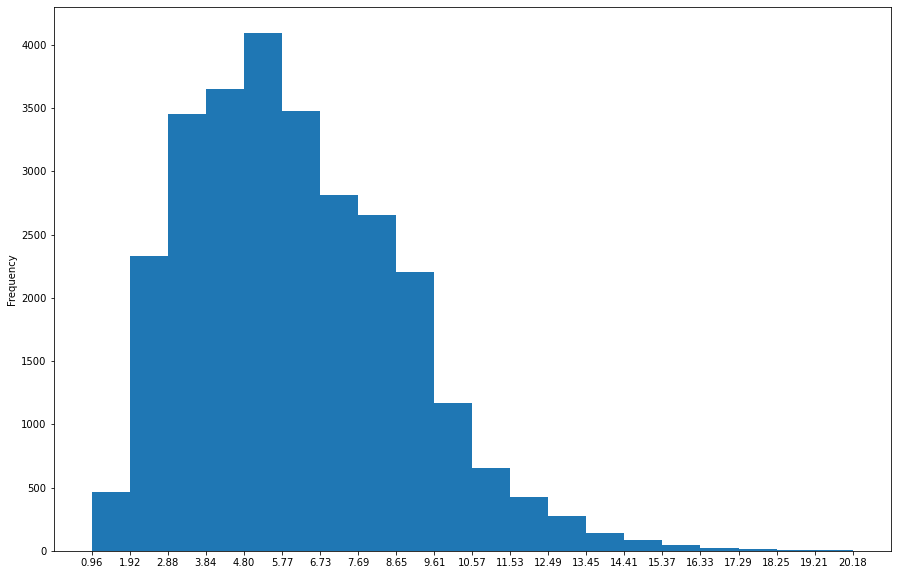

In [10]:
target = 'windmill_generated_power(kW/h)'  # Set target feature
bins = 20
plt.figure('Histogram ' + target, figsize=(15,10)) 
count, bin_edges = np.histogram(train[target].dropna(), bins)  # Determine histogram's bins
train[target].plot(kind='hist', bins=bins, xticks=bin_edges)

Next, the data is split in numerical (float64 or int64) and categorical features (e.g. str).

In [11]:
num_ftrs = train._get_numeric_data()  # Get numerical features
cat_ftrs = train.drop(num_ftrs.columns, axis=1)  # Get categorical features
num_ftrs_test = test._get_numeric_data()  # Same for test set
cat_ftrs_test = test.drop(num_ftrs_test.columns, axis=1)

And we plot a correlation matrix to look into the relation between numerical + target features. What stands out are the relatively high correlations between the target feature and the features: 'motor_torque(N-m)' (0.51), 'generator_temperature(°C)' (0.39), and 'wind_direction(°)' (0.36). 

In addition, 'motor_torque(N-m)' and 'generator_temperature(°C)' are strongly correlated (0.93).

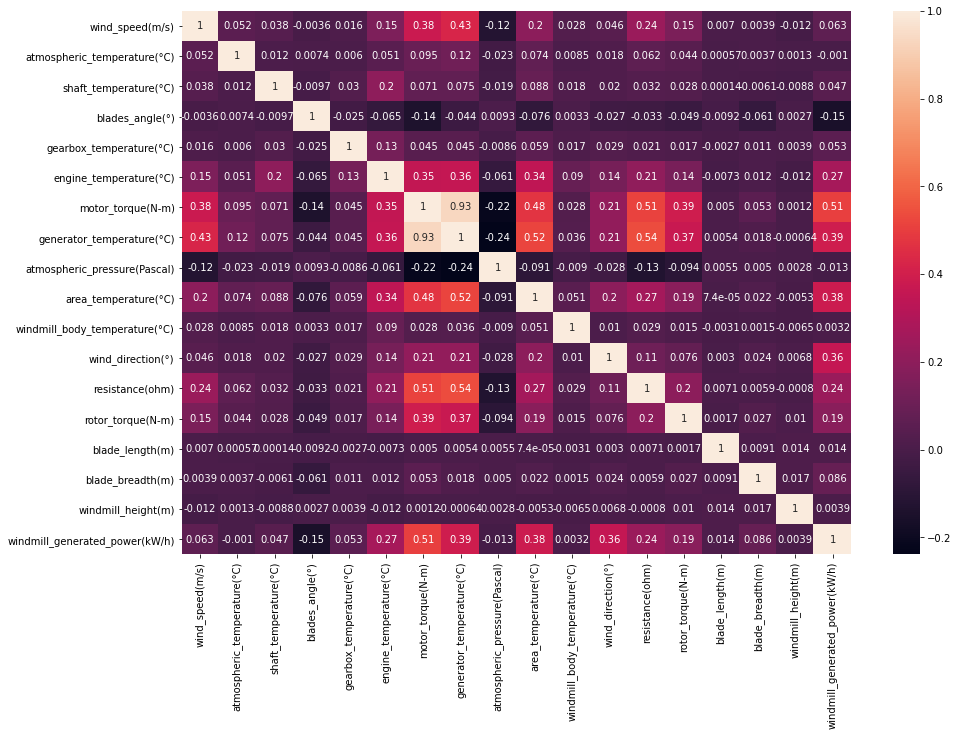

In [12]:
plt.figure('Correlation matrix', figsize=(15,10))
corr_matrix = num_ftrs.corr().round(2)
corr_heat = sns.heatmap(num_ftrs.corr(), annot=True)

Now, let us check-out the categorical features once more. It shows that 'cloud_level'and 'datetime' may actually be converted to numerical features.

In [13]:
cat_ftrs.head()

,tracking_id,datetime,turbine_status,cloud_level
0,WM_33725,2019-08-04 14:33:20,BA,Medium
1,WM_698,2018-11-05 10:13:20,A2,Medium
2,WM_39146,2019-09-14 14:03:20,ABC,Medium
3,WM_6757,2018-12-25 15:33:20,ABC,NaN
4,WM_21521,2019-05-04 03:13:20,AAA,Medium


In [14]:
cat_ftrs_test.head()

,tracking_id,datetime,turbine_status,cloud_level
0,WM_19817,2019-04-17 08:53:20,BA,Medium
1,WM_18723,2019-03-30 07:43:20,A,Medium
2,WM_34552,2019-08-10 11:33:20,B2,Medium
3,WM_28570,2019-06-26 03:53:20,BBB,Low
4,WM_36934,2019-08-27 16:43:20,A,Low


In [15]:
cat_ftrs['cloud_level'].unique()

array(['Medium', nan, 'Low', 'Extremely Low'], dtype=object)

In [16]:
cat_ftrs_test['cloud_level'].unique()

array(['Medium', 'Low', nan, 'Extremely Low'], dtype=object)

### Verify data quality
#### Missing data
First, let's take a look at the missing numerical data. 

The bar plot below shows that for several features, but especially for 'blade_length(m)', 'atmospheric_temperature(°C)', 'atmospheric_pressure(Pascal)', and 'windmill_body_temperature(°C)' there is quite some data missing.

<AxesSubplot:ylabel='Missing data [%]'>

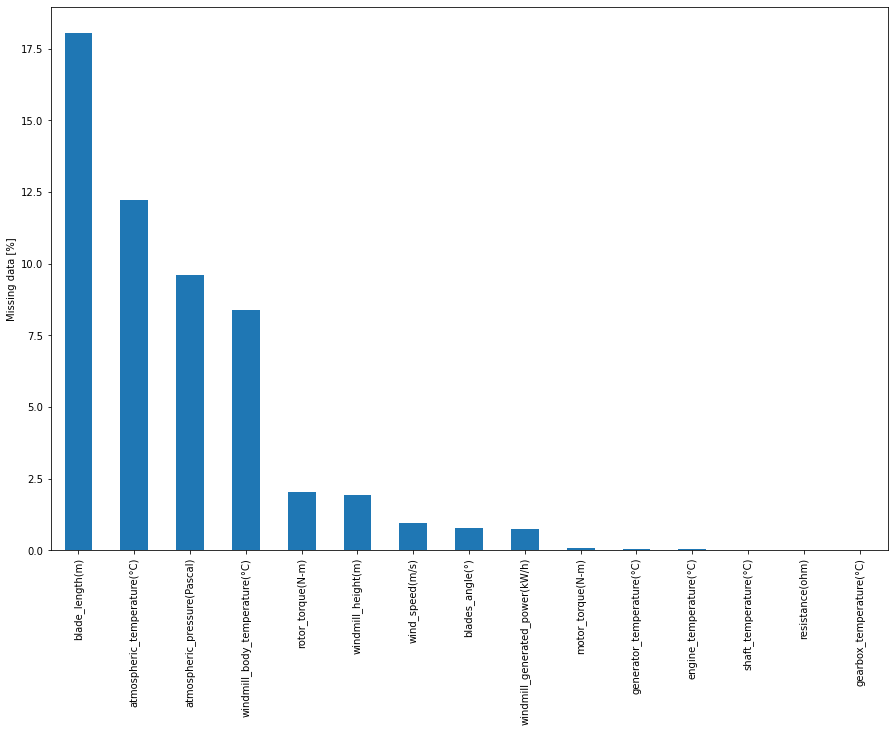

In [17]:
plt.figure('Missing numerical data', figsize=(15,10))
plt.ylabel('Missing data [%]')
data_nan = (num_ftrs.isnull().sum() / len(num_ftrs)) * 100
data_nan = data_nan[data_nan > 0].sort_values(ascending=False)
data_nan[1:].plot(kind='bar')

Next, let's take look at missing the categorical data. 

The bar plot below shows that for 'turbine_status' and 'cloud_level', quite some data is missing.

<AxesSubplot:ylabel='Missing data [%]'>

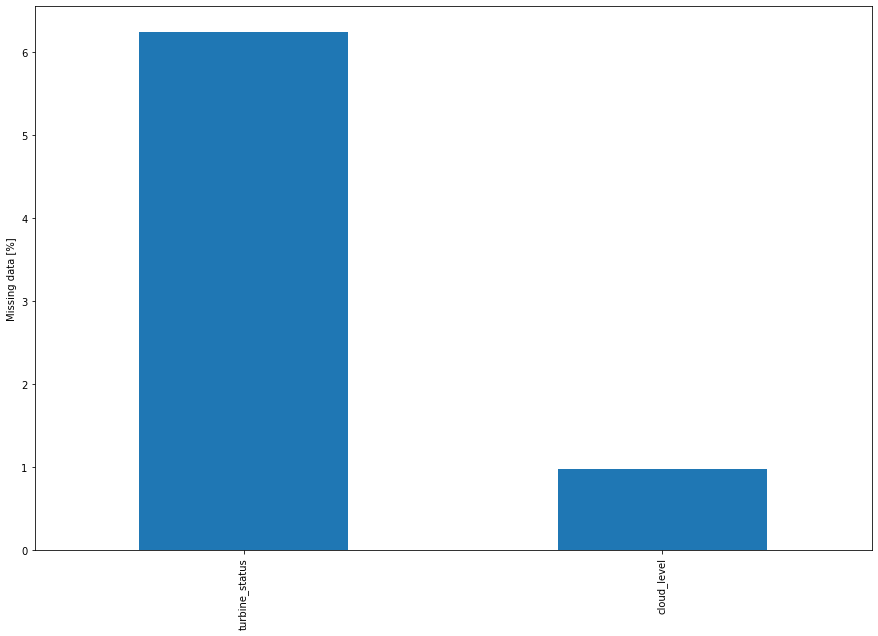

In [18]:
plt.figure('Missing categorical data', figsize=(15,10))
plt.ylabel('Missing data [%]')
data_nan = (cat_ftrs.isnull().sum() / len(cat_ftrs)) * 100
data_nan = data_nan[data_nan > 0].sort_values(ascending=False)
data_nan.plot(kind='bar')

Finally, make sure that there are no unnoticed missing values in the categorical features which are defined as a string like, for example, 'Unknown'.

In [19]:
for ftr in 'cloud_level', 'turbine_status':
    print (cat_ftrs[ftr].unique())

['Medium' nan 'Low' 'Extremely Low']
['BA' 'A2' 'ABC' 'AAA' 'BD' 'AC' 'BB' 'BCB' 'B' 'AB' nan 'B2' 'BBB' 'A'
 'D']


#### Outliers
Subsequently, we look for potential outliers in the numerical features. These are identified by calculating the z-score. This represents how many standard deviations a value deviates from the mean. The farther away, the more likely the value is an outlier. 

In the scatter plots below, a value with a z-score of 3 or more is colored red. Please keep in mind that red indicates a potential outlier which is not necessarily an actual outlier!

The features which contain outliers and how to filter/mask these is noted below:
- 'atmospheric_temperature(°C)' < -80
- 'shaft_temperature(°C)' <= -99
- 'gearbox_temperature(°C)' > 800
- 'windmill_body_temperature(°C)' <= -99
- 'blade_length(m)' < -100

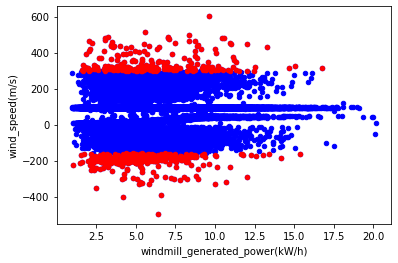

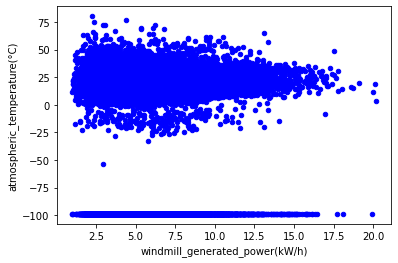

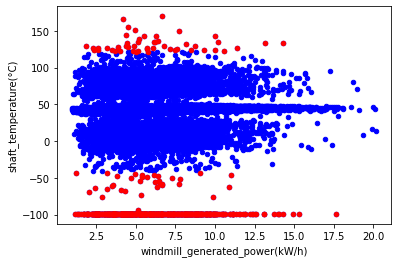

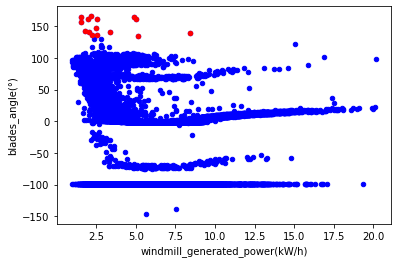

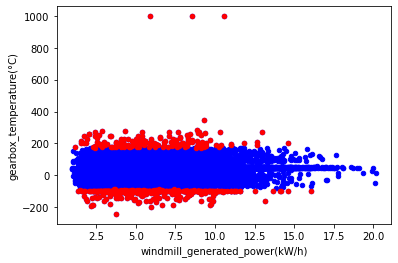

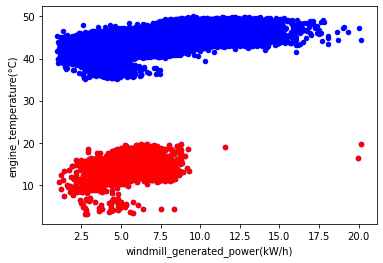

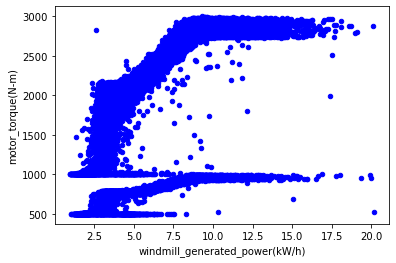

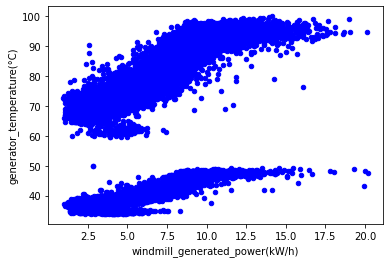

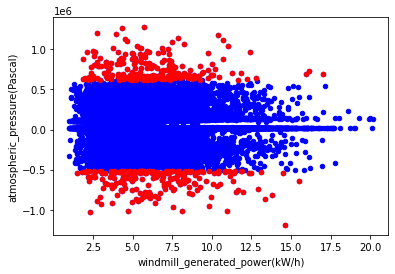

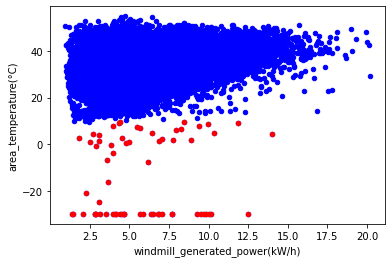

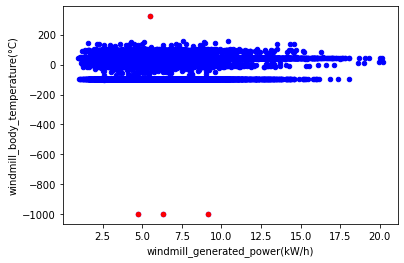

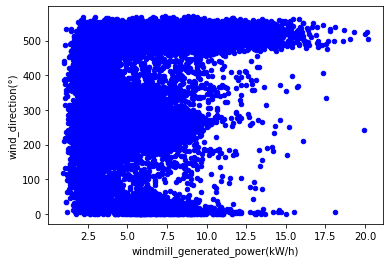

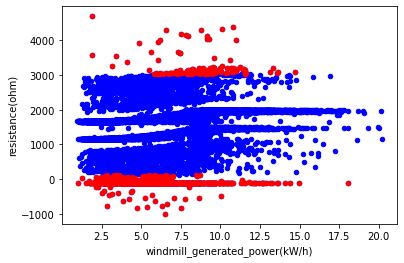

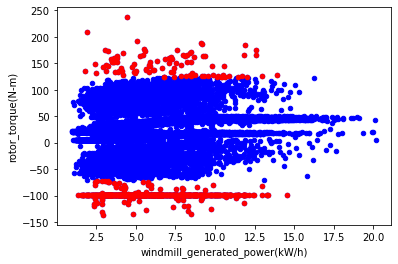

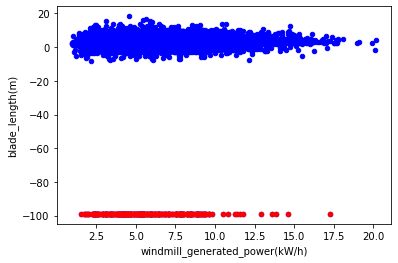

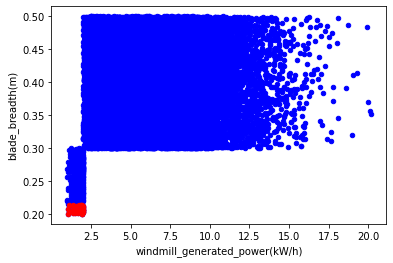

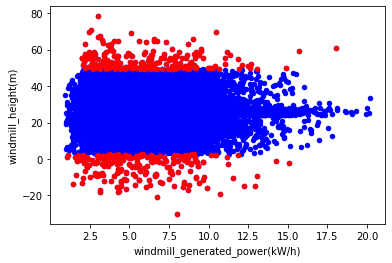

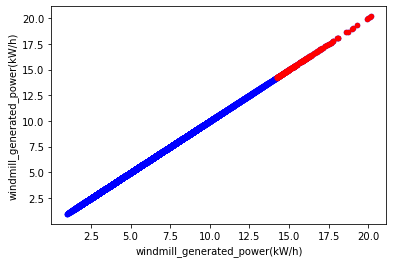

In [20]:
dic_out = {}
for col in num_ftrs.columns:
    nna = num_ftrs[num_ftrs[col].notna()]
    nna.reset_index(drop=True, inplace=True)
    out = np.array(nna[col])
    z_score = abs(stats.zscore(out))
    out_index = np.where(z_score > 3)
    out_count = len(out_index[0])
    dic_out[col] = {}
    dic_out[col]['values'] = num_ftrs[col].dropna()
    dic_out[col]['z_score'] = z_score
    dic_out[col]['out_index'] = list(out_index[0])
    dic_out[col]['out_count '] = out_count
    # Plot
    fig = plt.figure(col + ' outliers')
    ax0 = fig.add_subplot(1, 1, 1)
    nna.plot.scatter(target, col, color='b', ax=ax0)
    nna.loc[dic_out[col]['out_index'], :].plot.scatter(target, col, color='r', ax=ax0)

## 2. Data Preparation
The following steps are taken to prepare the data:
- Remove outliers
- Encoding
- Feature engineering
- Fill missing data
- Reformat & Standardize

### Remove outliers
We will remove the outliers that were found in the previous section (section Data Understanding > Verify data quality > Outliers)

In [21]:
for df in num_ftrs, num_ftrs_test:
    df['atmospheric_temperature(°C)'] = [float('NaN') if value < -80 else value for value in df['atmospheric_temperature(°C)']]
    df['shaft_temperature(°C)'] = [float('NaN') if value <= -99 else value for value in df['shaft_temperature(°C)']]
    df['gearbox_temperature(°C)'] = [float('NaN') if value > 800 else value for value in df['gearbox_temperature(°C)']]
    df['windmill_body_temperature(°C)'] = [float('NaN') if value <= -99 else value for value in df['windmill_body_temperature(°C)']]
    df['blade_length(m)'] = [float('NaN') if value < -100 else value for value in df['blade_length(m)']]

### Encoding
We will encode the 'cloud_level' and 'turbine_status' features.

In [22]:
encoding_cloud_level = {'Extremely Low': 1, 'Low': 2, 'Medium': 3}
for df in cat_ftrs, cat_ftrs_test:
    df['cloud_level'] = df['cloud_level'].map(encoding_cloud_level)

In [23]:
for df in cat_ftrs, cat_ftrs_test:
    df['turbine_status'].replace('B2', 'BB', inplace=True)
    df['turbine_status'].replace('A2', 'AA', inplace=True)

Next the feature 'turbine_status' will be transformed to a dummy variable because it cannot be transformed to numerical values

In [24]:
cat_ftrs['data_set'] = 'train'
cat_ftrs_test['data_set'] = 'test'

In [25]:
cat_ftrs_train_test = pd.concat([cat_ftrs, cat_ftrs_test], axis = 0)

In [26]:
dumm_ftr = 'turbine_status'
df_dumm = pd.get_dummies(cat_ftrs_train_test[dumm_ftr])

In [27]:
cat_ftrs_train_test.drop('turbine_status', axis=1, inplace=True)
cat_ftrs = pd.concat([cat_ftrs_train_test, df_dumm], axis=1)
cat_ftrs.head()

,tracking_id,datetime,cloud_level,data_set,A,AA,AAA,AB,ABC,AC,B,BA,BB,BBB,BCB,BD,D
0,WM_33725,2019-08-04 14:33:20,3.0,train,0,0,0,0,0,0,0,1,0,0,0,0,0
1,WM_698,2018-11-05 10:13:20,3.0,train,0,1,0,0,0,0,0,0,0,0,0,0,0
2,WM_39146,2019-09-14 14:03:20,3.0,train,0,0,0,0,1,0,0,0,0,0,0,0,0
3,WM_6757,2018-12-25 15:33:20,NaN,train,0,0,0,0,1,0,0,0,0,0,0,0,0
4,WM_21521,2019-05-04 03:13:20,3.0,train,0,0,1,0,0,0,0,0,0,0,0,0,0


Split categorical train and test set again and concatenate with numerical counterparts

In [28]:
cat_ftrs_test = cat_ftrs.loc[cat_ftrs['data_set']== 'test'].drop('data_set', axis=1)
cat_ftrs = cat_ftrs.loc[cat_ftrs['data_set']!= 'test'].drop('data_set', axis=1)

In [29]:
train = pd.concat([num_ftrs, cat_ftrs], axis=1)
test = pd.concat([num_ftrs_test, cat_ftrs_test], axis=1)

### Feature engineering
We will create the features 'day_of_the_year' and 'time_of_day' using the 'datetime' feature.

Extract 'day of the year' and 'time of day' from 'datetime' column

In [30]:
for df in train, test:
    df['year'] = [datetime[:4] for datetime in df['datetime']]  # Create column with year only
    df['datetime'] = pd.to_datetime(df['datetime'])  # Change string datetime to pandas datetime
    df['epoch_datetime_days'] = (df['datetime'] - dt.datetime(1970,1,1)).dt.total_seconds()/(3600*24)  # Determine epoch time in days
    df['year'] = pd.to_datetime(df['year'])  # Change string year to pandas year
    df['epoch_year_days'] = (df['year'] - dt.datetime(1970,1,1)).dt.total_seconds()/(3600*24)  # Determine epoch time year in days
    df['daytime_of_the_year'] = df['epoch_datetime_days'] - df['epoch_year_days']  # Subtract epoch year from datetime to determine daytime of the year 
    df['day_of_the_year'] = [math.floor(daytime) for daytime in df['daytime_of_the_year']]  # Determine day of the year
    df['time_of_day'] = (df['daytime_of_the_year'] - df['day_of_the_year'])*24  # Subtract day from daytime to determine time of the day
    

Remove irrelevant columns

In [31]:
for df in train, test:
    df.drop(['year', 'datetime', 'epoch_datetime_days', 'epoch_year_days', 'daytime_of_the_year', 'tracking_id'], axis=1, inplace=True)

### Fill missing data
Some features are missing data (> 0 below) (also see section Exploration):

In [32]:
data_nan = (test.isnull().sum() / len(train)) * 100
data_nan

wind_speed(m/s)                   0.446809
atmospheric_temperature(°C)      10.989362
shaft_temperature(°C)             0.861702
blades_angle(°)                   0.375887
gearbox_temperature(°C)           0.003546
engine_temperature(°C)            0.017730
motor_torque(N-m)                 0.039007
generator_temperature(°C)         0.017730
atmospheric_pressure(Pascal)      4.081560
area_temperature(°C)              0.003546
windmill_body_temperature(°C)     9.308511
wind_direction(°)                 7.659574
resistance(ohm)                   0.000000
rotor_torque(N-m)                 0.996454
blade_length(m)                   7.496454
blade_breadth(m)                  0.000000
windmill_height(m)                0.904255
cloud_level                       0.443262
A                                 0.000000
AA                                0.000000
AAA                               0.000000
AB                                0.000000
ABC                               0.000000
AC         

In [33]:
data_nan = (train.isnull().sum() / len(train)) * 100
data_nan

wind_speed(m/s)                    0.968085
atmospheric_temperature(°C)       26.212766
shaft_temperature(°C)              1.982270
blades_angle(°)                    0.765957
gearbox_temperature(°C)            0.014184
engine_temperature(°C)             0.042553
motor_torque(N-m)                  0.085106
generator_temperature(°C)          0.042553
atmospheric_pressure(Pascal)       9.599291
area_temperature(°C)               0.000000
windmill_body_temperature(°C)     22.315603
wind_direction(°)                 18.095745
resistance(ohm)                    0.003546
rotor_torque(N-m)                  2.028369
blade_length(m)                   18.060284
blade_breadth(m)                   0.000000
windmill_height(m)                 1.925532
windmill_generated_power(kW/h)     0.734043
cloud_level                        0.978723
A                                  0.000000
AA                                 0.000000
AAA                                0.000000
AB                              

Drop rows from train data that do not have a "windmill_generated_power(kW/h)" value (NaN)

In [34]:
len(train)

28200

In [35]:
train = train[train ['windmill_generated_power(kW/h)'].notna()]

In [36]:
len(train)

27993

An iterative imputer is used to fill the missing numerical values.

In [37]:
y_train = train[target]
y_train.reset_index(drop=True, inplace=True)
X_train = train.drop(target, axis=1)
X_train.reset_index(drop=True, inplace=True)
X_train_cols = X_train.columns

imputer = IterativeImputer()
imputer.fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train))
X_train.columns = X_train_cols
train = pd.concat([X_train, y_train], axis=1)

test_cols = test.columns
# imputer = IterativeImputer()
# imputer.fit(test)
test = pd.DataFrame(imputer.transform(test))
test.columns = test_cols

C:\Users\MBRU\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


Now none of the features are missing data anymore

In [38]:
data_nan = (test.isnull().sum() / len(train)) * 100
data_nan

wind_speed(m/s)                  0.0
atmospheric_temperature(°C)      0.0
shaft_temperature(°C)            0.0
blades_angle(°)                  0.0
gearbox_temperature(°C)          0.0
engine_temperature(°C)           0.0
motor_torque(N-m)                0.0
generator_temperature(°C)        0.0
atmospheric_pressure(Pascal)     0.0
area_temperature(°C)             0.0
windmill_body_temperature(°C)    0.0
wind_direction(°)                0.0
resistance(ohm)                  0.0
rotor_torque(N-m)                0.0
blade_length(m)                  0.0
blade_breadth(m)                 0.0
windmill_height(m)               0.0
cloud_level                      0.0
A                                0.0
AA                               0.0
AAA                              0.0
AB                               0.0
ABC                              0.0
AC                               0.0
B                                0.0
BA                               0.0
BB                               0.0
B

In [39]:
data_nan = (train.isnull().sum() / len(train)) * 100
data_nan

wind_speed(m/s)                   0.0
atmospheric_temperature(°C)       0.0
shaft_temperature(°C)             0.0
blades_angle(°)                   0.0
gearbox_temperature(°C)           0.0
engine_temperature(°C)            0.0
motor_torque(N-m)                 0.0
generator_temperature(°C)         0.0
atmospheric_pressure(Pascal)      0.0
area_temperature(°C)              0.0
windmill_body_temperature(°C)     0.0
wind_direction(°)                 0.0
resistance(ohm)                   0.0
rotor_torque(N-m)                 0.0
blade_length(m)                   0.0
blade_breadth(m)                  0.0
windmill_height(m)                0.0
cloud_level                       0.0
A                                 0.0
AA                                0.0
AAA                               0.0
AB                                0.0
ABC                               0.0
AC                                0.0
B                                 0.0
BA                                0.0
BB          

### Reformat & Standardize
As seen in the previous section (section Data Understanding > Explore), the distribution of the target feature is right skewed. This skewness will need to be removed to improve the performance of the model.

<AxesSubplot:ylabel='Frequency'>

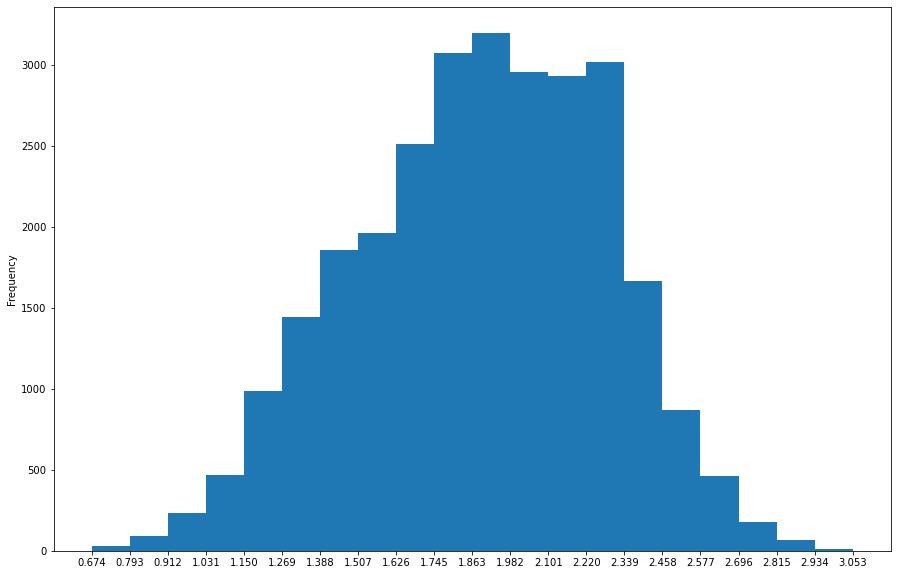

In [40]:
# Transform dependent variable (right skewed)
train[target] = np.log1p(train[target])
bins = 20
plt.figure('Histogram 2' + target, figsize=(15,10)) 
count, bin_edges = np.histogram(train[target].dropna(), bins)  # Determine histogram's bins
train[target].plot(kind='hist', bins=bins, xticks=bin_edges)

In [41]:
# Split
X_train = train.drop(target, axis=1)
X_train.reset_index(drop=True, inplace=True)

X_test = test
X_test.reset_index(drop=True, inplace=True)

y_train = train[target]
y_train.reset_index(drop=True, inplace=True)

In [42]:
# Standardize
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  # Scale train data
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)  # Scale test data
X_train.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,AC,B,BA,BB,BBB,BCB,BD,D,day_of_the_year,time_of_day
count,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,...,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04,2.799300e+04
mean,1.385687e-16,-3.983748e-17,3.939104e-17,-3.115232e-16,-2.721687e-17,-1.053369e-16,-1.738846e-16,-4.669695e-16,2.776252e-19,-4.650697e-16,...,-4.296051e-16,-2.019941e-15,5.901835e-16,-9.867155e-16,-4.477856e-16,2.806098e-15,2.419242e-15,-3.833805e-16,8.175466e-17,-3.573787e-16
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-7.434451e+00,-7.653410e+00,-7.262964e+00,-2.860617e+00,-6.720213e+00,-6.420823e+00,-2.913985e+00,-3.200477e+00,-6.945833e+00,-8.142696e+00,...,-2.653227e-01,-2.675527e-01,-2.648596e-01,-3.992123e-01,-2.626129e-01,-2.713658e-01,-2.644733e-01,-2.703782e-01,-1.631997e+00,-1.735400e+00
25%,-6.299661e-01,-7.141735e-01,-5.738783e-02,1.769979e-01,-8.115655e-03,-1.127948e-01,-1.014703e+00,-1.201102e+00,-2.034045e-01,-7.032072e-01,...,-2.653227e-01,-2.675527e-01,-2.648596e-01,-3.992123e-01,-2.626129e-01,-2.713658e-01,-2.644733e-01,-2.703782e-01,-8.833342e-01,-8.684415e-01
50%,3.188007e-01,-1.468331e-02,4.654845e-02,1.914312e-01,5.448900e-02,1.499273e-01,3.883508e-01,2.882698e-01,-1.943365e-01,-1.768011e-02,...,-2.653227e-01,-2.675527e-01,-2.648596e-01,-3.992123e-01,-2.626129e-01,-2.713658e-01,-2.644733e-01,-2.703782e-01,-2.095053e-02,2.259903e-02
75%,3.449421e-01,5.918093e-01,1.516465e-01,3.156187e-01,1.168094e-01,4.177980e-01,9.079018e-01,7.023446e-01,3.582656e-01,7.119095e-01,...,-2.653227e-01,-2.675527e-01,-2.648596e-01,-3.992123e-01,-2.626129e-01,-2.713658e-01,-2.644733e-01,-2.703782e-01,6.992820e-01,8.654752e-01
max,7.002511e+00,6.397596e+00,6.780506e+00,3.677021e+00,7.235267e+00,1.204414e+00,1.559314e+00,1.765527e+00,6.820566e+00,2.890946e+00,...,3.768995e+00,3.737582e+00,3.775585e+00,2.504933e+00,3.807887e+00,3.685063e+00,3.781101e+00,3.698524e+00,1.817538e+00,1.708351e+00


In [43]:
count_inf = np.isinf(X_train).values.sum()

In [44]:
y_train.isna().values.sum()

0

## 3. Modeling
This section consists of:
- Training and evaluation
- Model selection
- Further evaluation
- Estimation

Each algorithm is optimized/evaluated using:
- Hyper parameter optimization 
- K-fold cross validation (r2 score)

### Training and evalutation

In [45]:
# Create storage for scores and estimators
dic_scores = {}
dic_estimators = {}
score = 'r2'
cv = 5

In [46]:
# Linear
lr = linear_model.LinearRegression()
dic_scores['Linear'] = cross_val_score(lr, X_train, y_train, cv=cv, scoring=score).mean()  # Save score
dic_estimators['Linear'] = lr  # Save estimator

In [47]:
max(0, 100 * dic_scores['Linear'])

52.00527947320145

In [48]:
# Random Forest
rf_par_grid = {  # Set hyper paramater options
    "max_depth": [50, 100],
    "min_samples_leaf": [2, 5],
    "min_samples_split": [2, 5],
}
rf = RandomForestRegressor(random_state=1)  # Set classifier 
rf_gs = GridSearchCV(estimator=rf, param_grid=rf_par_grid)  # Set grid search
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)  # Print best hyper parameters
rf = RandomForestRegressor(**rf_gs.best_params_, random_state=1)
dic_scores['Random Forest'] = cross_val_score(rf, X_train, y_train, cv=cv, scoring=score).mean()
dic_estimators['Random Forest'] = rf

{'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [49]:
max(0, 100 * dic_scores['Random Forest'])

96.88115544111034

In [50]:
# Gradient Boosting Tree
gbt_par_grid = {
    "max_depth": [25, 50],
    "min_samples_split": [2, 5],
    "learning_rate": [0.001, 0.01],    
    }
gbt = GradientBoostingRegressor(n_estimators=500, random_state=1)
gbt_gs = GridSearchCV(estimator=gbt, param_grid=gbt_par_grid)
gbt_gs.fit(X_train, y_train)
print(gbt_gs.best_params_)
gbt = GradientBoostingRegressor(**gbt_gs.best_params_, n_estimators=500, random_state=1)
dic_scores['Gradient Boosting Tree'] = cross_val_score(gbt, X_train, y_train, cv=cv, scoring=score).mean()
dic_estimators['Gradient Boosting Tree'] = gbt

{'learning_rate': 0.01, 'max_depth': 25, 'min_samples_split': 5}


In [51]:
max(0, 100 * dic_scores['Gradient Boosting Tree'])

95.79118934894304

In [53]:
# Extreme Gradient Boosting
xgbr_par_grid = {
    "max_depth": [5, 10],
    "learning_rate": [0.01, 0.1],
    "reg_alpha": [0.1, 0.2],
    "reg_lambda": [0.01, 0.1],
}
xgbr = XGBRegressor(n_estimators=500, booster='gbtree', random_state=1)
xgbr_gs = GridSearchCV(estimator=xgbr, param_grid=xgbr_par_grid)
xgbr_gs.fit(X_train, y_train)
print(xgbr_gs.best_params_)
xgbr = XGBRegressor(**xgbr_gs.best_params_, n_estimators=1000, booster='gbtree', random_state=1)
dic_scores['Extreme Gradient Boosting'] = cross_val_score(xgbr, X_train, y_train, cv=cv, scoring=score).mean()
dic_estimators['Extreme Gradient Boosting'] = xgbr

{'learning_rate': 0.1, 'max_depth': 5, 'reg_alpha': 0.1, 'reg_lambda': 0.01}


In [54]:
max(0, 100 * dic_scores['Extreme Gradient Boosting'])

97.15095106411853

### Model selection

In [55]:
df_scores = pd.DataFrame.from_dict(dic_scores, orient='index').sort_values(by=0, axis=0, ascending=False)
estimator = dic_estimators[df_scores.index[0]]
print(df_scores)

                                  0
Extreme Gradient Boosting  0.971510
Random Forest              0.968812
Gradient Boosting Tree     0.957912
Linear                     0.520053


### Further evaluation
To further evaluate whether the selected model is suffering from over- or under-fitting and determine possible additional optimizations, we plot the associated learning curves:

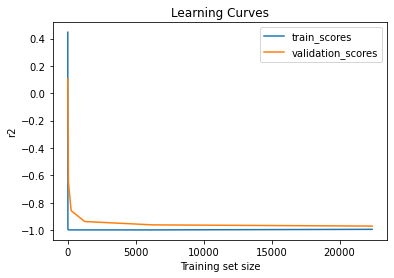

In [56]:
# Set-up
train_sizes = [2, 10, 50, 250, 1250, 6250, 22394]
train_sizes, train_scores, validation_scores = learning_curve(estimator=estimator, X=X_train, y=y_train,
                                                              train_sizes=train_sizes, cv=cv,
                                                              scoring=score)
train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
df_lc = pd.DataFrame()
df_lc['train_scores'] = pd.Series(train_scores_mean)
df_lc['validation_scores'] = pd.Series(validation_scores_mean)
df_lc.set_index(train_sizes, inplace=True)

# Plot
fig = plt.figure('Learning Curves')
ax0 = fig.add_subplot(1, 1, 1)
df_lc.plot(kind='line', ax=ax0)
plt.xlabel('Training set size')
plt.ylabel(score)
plt.title('Learning Curves')
plt.legend()

In addition, we will plot the relation between the number of features and cross validation scores. In this way we can determine the optimal number of features.

Optimal number of features : 11


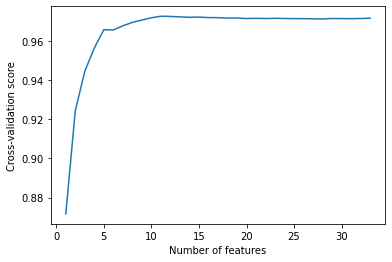

In [57]:
# Feature selection
rfecv = RFECV(estimator=estimator, step=1, cv=cv, scoring=score)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS cross-validation scores
plt.figure('Recursive Feature Elimination')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# Feature selection
X_train = X_train.loc[:, rfecv.support_]
X_test = X_test.loc[:, rfecv.support_]

In [58]:
X_train.head()

,wind_speed(m/s),blades_angle(°),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),resistance(ohm),blade_breadth(m),day_of_the_year,time_of_day
0,0.339032,0.183301,-0.012975,1.031349,0.588487,0.281022,-0.756922,2.389137,-1.358985,0.405503,0.359749
1,2.272603,-1.870950,0.595290,0.800839,0.662346,-0.202094,0.918062,0.423620,0.837264,1.286840,-0.266387
2,0.347774,0.467182,0.044913,-0.063498,0.133947,-0.207156,0.439668,0.187458,-1.550851,0.794049,0.287503
3,2.232971,0.518751,0.761891,1.424124,1.532987,-0.192815,1.725280,0.804879,-0.491869,1.760677,0.504243
4,-0.767049,0.238148,0.141188,-1.121509,-1.390992,0.342914,0.239359,-0.823192,0.916980,-0.466357,-1.277838


### Estimation
Estimate target for test set.

In [59]:
# Create output
estimator.fit(X_train, y_train)
pred = pd.DataFrame()
pred['tracking_id'] = id_datetime['tracking_id']
pred['datetime'] = id_datetime['datetime']
pred[target] = estimator.predict(X_test)
pred[target] = np.expm1(pred[target])  # Transform it back
pred.set_index('tracking_id', drop=True, inplace=True)

In [60]:
pred.head()

,datetime,windmill_generated_power(kW/h)
tracking_id,,
WM_19817,2019-04-17 08:53:20,2.705782
WM_18723,2019-03-30 07:43:20,2.482394
WM_34552,2019-08-10 11:33:20,3.421627
WM_28570,2019-06-26 03:53:20,6.702231
WM_36934,2019-08-27 16:43:20,3.393260


In [61]:
pred.to_csv(r'C:\Users\MBRU\PycharmProjects\GitProjects\Data_Science\A_Fine_Windy_Day_(HackerEarth)\windmill_generated_power_prediction.csv')